In [1]:
import pandas as pd

In [2]:
daily_weather = pd.read_parquet("daily_weather.parquet")

In [3]:
daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27635763 entries, 0 to 24220
Data columns (total 14 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   station_id              category      
 1   city_name               category      
 2   date                    datetime64[us]
 3   season                  category      
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
dtypes: category(3), datetime64[us](1), float64(10)
memory usage: 2.6 GB


In [4]:
daily_weather.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
countries = pd.read_csv("countries.csv")
cities = pd.read_csv("cities.csv")

In [6]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1245 non-null   object 
 1   city_name   1244 non-null   object 
 2   country     1245 non-null   object 
 3   state       1217 non-null   object 
 4   iso2        1239 non-null   object 
 5   iso3        1245 non-null   object 
 6   latitude    1245 non-null   float64
 7   longitude   1245 non-null   float64
dtypes: float64(2), object(6)
memory usage: 77.9+ KB


In [7]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      214 non-null    object 
 1   native_name  213 non-null    object 
 2   iso2         213 non-null    object 
 3   iso3         214 non-null    object 
 4   population   210 non-null    float64
 5   area         207 non-null    float64
 6   capital      212 non-null    object 
 7   capital_lat  212 non-null    float64
 8   capital_lng  212 non-null    float64
 9   region       205 non-null    object 
 10  continent    206 non-null    object 
dtypes: float64(4), object(7)
memory usage: 18.5+ KB


In [8]:
daily_weather.shape

(27635763, 14)

In [9]:
unique_values = daily_weather.nunique()
unique_values

station_id                 1227
city_name                  1234
date                      69648
season                        4
avg_temp_c                 1048
min_temp_c                 1029
max_temp_c                 1142
precipitation_mm           2812
snow_depth_mm               888
avg_wind_dir_deg            361
avg_wind_speed_kmh          944
peak_wind_gust_kmh          663
avg_sea_level_pres_hpa     1170
sunshine_total_min          997
dtype: int64

In [10]:
daily_weather.isna().sum()

station_id                       0
city_name                    13993
date                             0
season                           0
avg_temp_c                 6230907
min_temp_c                 5718229
max_temp_c                 5539346
precipitation_mm           6642500
snow_depth_mm             24208615
avg_wind_dir_deg          24183195
avg_wind_speed_kmh        22350295
peak_wind_gust_kmh        26514277
avg_sea_level_pres_hpa    23618606
sunshine_total_min        26614302
dtype: int64

<Axes: >

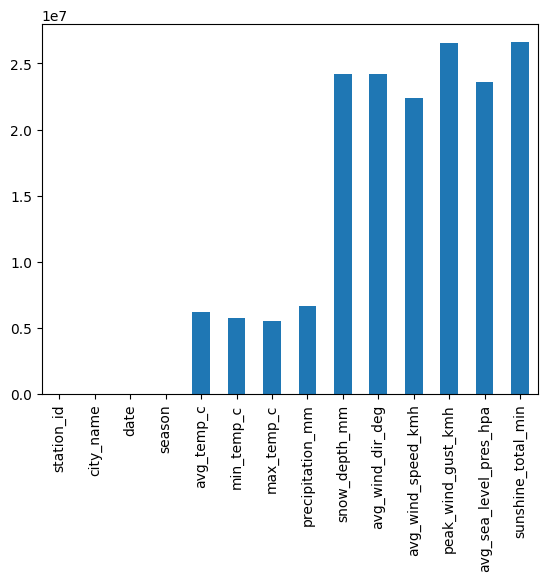

In [11]:
daily_weather.isna().sum().plot(kind='bar')

In [12]:
daily_weather.drop(columns=['peak_wind_gust_kmh','sunshine_total_min',
                            'snow_depth_mm','avg_wind_dir_deg',
                            'avg_wind_speed_kmh','avg_sea_level_pres_hpa'],inplace=True)

In [13]:
daily_weather.head(10)

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0
5,41515,Asadabad,1957-07-06,Summer,30.2,22.8,41.1,0.0
6,41515,Asadabad,1957-07-07,Summer,31.0,24.4,39.4,0.0
7,41515,Asadabad,1957-07-08,Summer,30.9,24.4,38.9,0.0
8,41515,Asadabad,1957-07-09,Summer,26.1,21.1,34.4,2.0
9,41515,Asadabad,1957-07-10,Summer,26.0,NaN,35.6,0.3


In [14]:
# need to replace NAN with mean temperature of respective cities